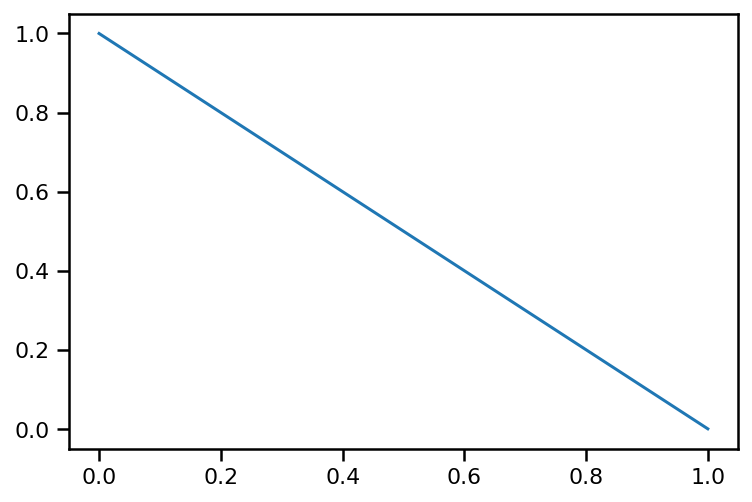

In [1]:
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
#%inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
import pickle


In [2]:
%%capture
import hide_imports

In [3]:
%%capture

plt.clf()
import copy
%matplotlib inline

def permutations(use_test,backend,MU=25,NGEN=25):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]
    ga_out1 =  use_test.optimize(backend=backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=2,NGEN=2)   
    dtc = ga_out1['pf'][0].dtc
    vm,plt = hide_imports.inject_and_plot_model(dtc)
    plt.show()
    return dtc, vm


In [4]:
from neuronunit.optimisation.data_transport_container import DataTC

In [5]:
dtc = DataTC(backend=str("RAW"))
backend=str("RAW")
dtc.backend = backend



# Subeqeunt parameters... 
will be overwritten by external code that are injected by the paper mill script.


In [6]:
#%%capture

tests = pickle.load(open('processed_multicellular_constraints.p','rb'))
testsr = tests['Neocortex pyramidal cell layer 5-6'].tests
testsr[3].observation['mean']
testsr[4].observation['mean']

print(dtc.attrs)
dtc.tests = testsr
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
dtc.attrs = dtc.dtc_to_model().default_attrs
dtc.attrs['C'] = testsr[3].observation['mean']
dtc.attrs['vr'] = testsr[4].observation['mean']
ranges = MODEL_PARAMS[backend]
ranges.pop('C',None)
ranges.pop('vr',None)

{}


(-75, -56)

In [7]:
from collections import OrderedDict
print(dtc.tests)
OM = dtc.dtc_to_opt_man()
#print(OM.ranges)
#OM.DO
OM.boundary_dict = ranges
OM.backend = backend
OM.td = list(ranges.keys())

pop,dtcpop = OM.boot_new_genes(100,dtc)
scores = []
for d in dtcpop:
    d.attrs['C'] = testsr[3].observation['mean']
    d.attrs['vr'] = testsr[4].observation['mean']


for d in dtcpop:
    d.tests = testsr
    d = d.self_evaluate()
    print(d.SA)

[<neuronunit.tests.fi.RheobaseTest object at 0x7f00e3f973c8>, <neuronunit.tests.passive.InputResistanceTest object at 0x7f00e3f97400>, <neuronunit.tests.passive.TimeConstantTest object at 0x7f00e3f97438>, <neuronunit.tests.passive.CapacitanceTest object at 0x7f00e3f97470>, <neuronunit.tests.passive.RestingPotentialTest object at 0x7f00e3f974a8>, <neuronunit.tests.waveform.InjectedCurrentAPWidthTest object at 0x7f00e3f974e0>, <neuronunit.tests.waveform.InjectedCurrentAPAmplitudeTest object at 0x7f00e3f97518>, <neuronunit.tests.waveform.InjectedCurrentAPThresholdTest object at 0x7f00e3f97550>]
[<neuronunit.optimisation.data_transport_container.DataTC object at 0x7f00e3f3ca90>, <neuronunit.optimisation.data_transport_container.DataTC object at 0x7f00e3f3c898>, <neuronunit.optimisation.data_transport_container.DataTC object at 0x7f00e3f0fa20>, <neuronunit.optimisation.data_transport_container.DataTC object at 0x7f00e3f3ce10>, <neuronunit.optimisation.data_transport_container.DataTC object 

In [8]:
hide_imports.display(dtc.SM)
hide_imports.display(dtc.obs_preds)


None

AttributeError: 'DataTC' object has no attribute 'obs_preds'

In [ ]:
plt.plot(vm.times,vm.magnitude)
hide_imports.inject_and_plot_model(dtc)
plt.show()


In [ ]:
#test_frame['Neocortex pyramidal cell layer 5-6']